In [1]:
import pandas as pd
url = 'https://github.com/mattharrison/datasets/raw/master/data/alta-noaa-1980-2019.csv'
alta_df = pd.read_csv(url, dtype_backend='pyarrow')

In [2]:
dates = pd.to_datetime(alta_df.DATE)
snow = (alta_df
        .SNOW
        .rename(dates)
        )

In [3]:
snow

1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: double[pyarrow]

Matplotlib is building the font cache; this may take a moment.


<Axes: ylabel='Frequency'>

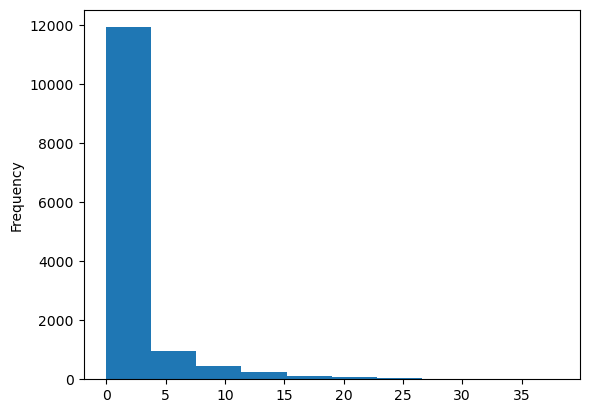

In [4]:
snow.plot.hist()

<Axes: title={'center': 'Snowfall Histogram (in)'}, ylabel='Frequency'>

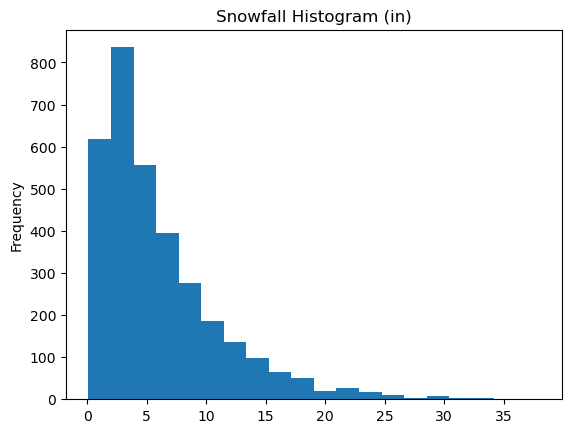

In [5]:
import numpy as np
snow[snow>0].plot.hist(bins=20, title='Snowfall Histogram (in)')

<Axes: ylabel='Frequency'>

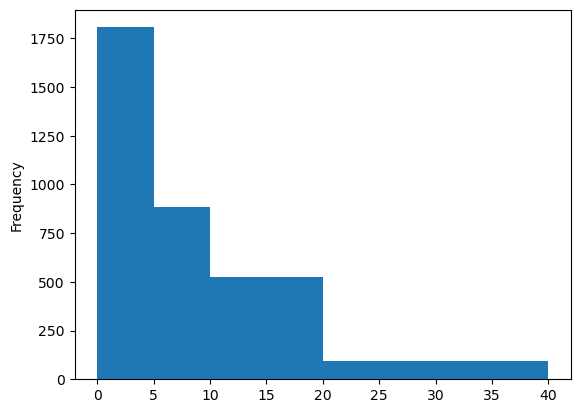

In [6]:
snow[snow>0].plot.hist(bins=[0,5,10,20, 40])

<Axes: >

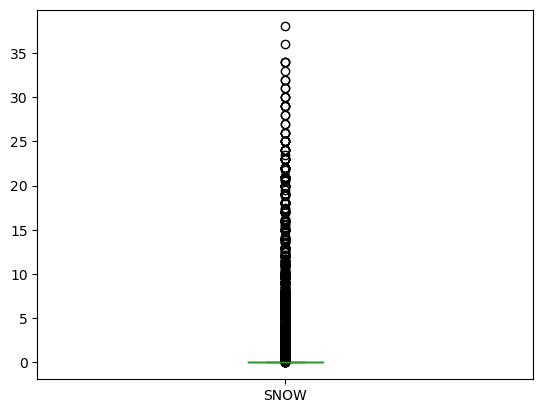

In [7]:
snow.plot.box()

<Axes: >

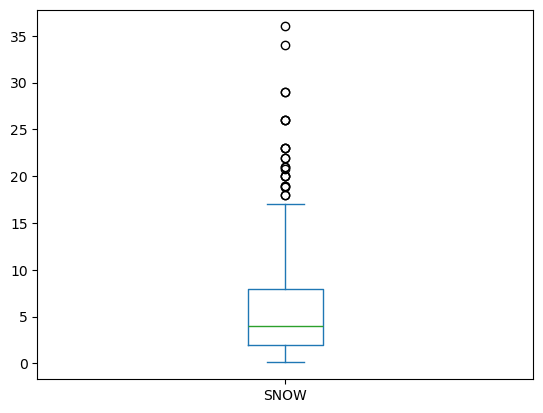

In [8]:
(snow
 [lambda s: (s.index.month == 1) & (s>0)]
 .plot.box()
 )

<Axes: ylabel='Density'>

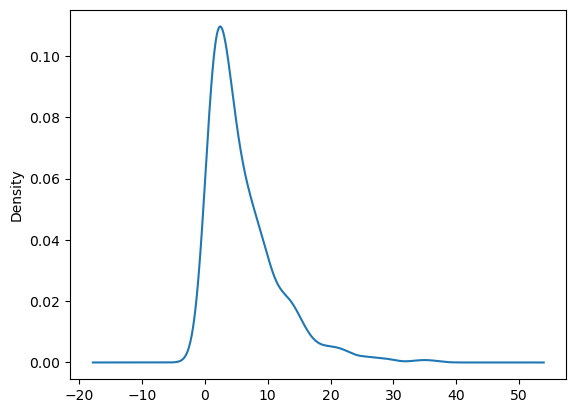

In [9]:
(snow
 [lambda s: (s.index.month == 1) & (s>0)]
 .plot.kde())

<Axes: >

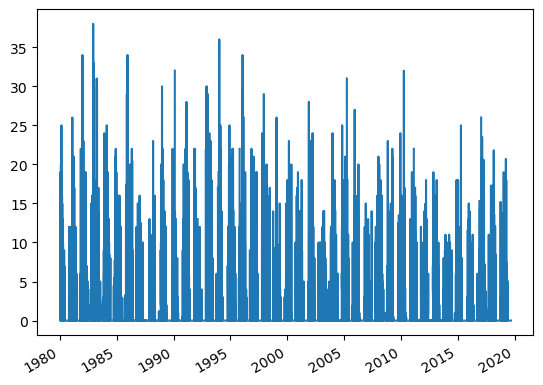

In [10]:
snow.plot.line()

<Axes: >

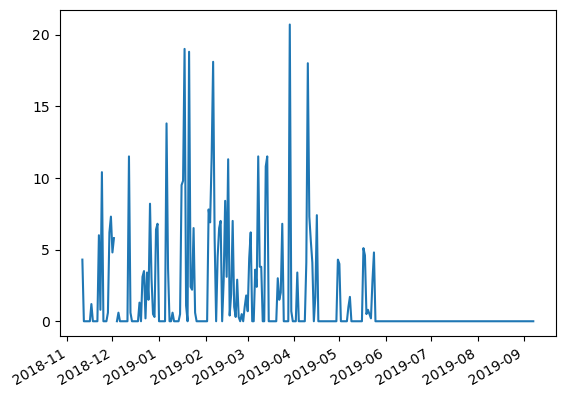

In [11]:
(snow
 .tail(300)
 .plot.line()
 )

<Axes: >

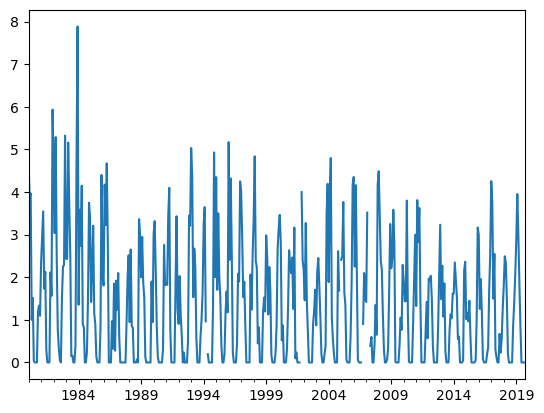

In [12]:
(snow
 .resample('ME')
 .mean()
 .plot.line()
 )

<Axes: >

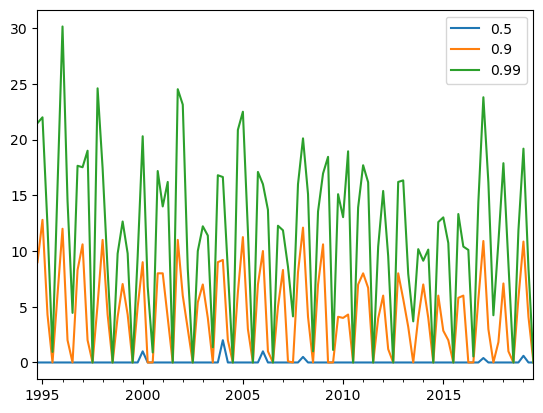

In [13]:
(snow
 .resample('QE')
 .quantile([.5,.9,.99]) # shows the single value where at that value, __% of the data points for that quater fall bellow it
 .unstack()
 .tail(100)
 .plot.line()
 )

In [14]:
season2017 = (snow.loc['2016-10':'2017-05'])
(season2017
 .resample('ME')
 .sum()
 .div(season2017.sum())
 .mul(100)
 .rename(lambda idx: idx.month_name())
)

October      2.153969
November     9.772637
December    15.715995
January     25.468688
February    21.041085
March        9.274033
April       14.738732
May          1.834862
Name: SNOW, dtype: double[pyarrow]

<Axes: title={'center': '2017 Monthly Percent of Snowfall'}>

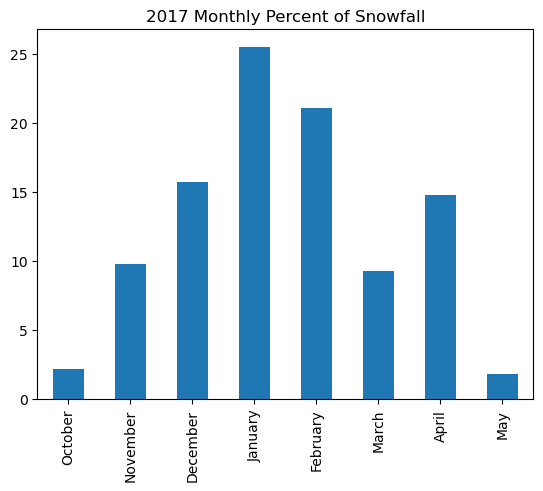

In [15]:
season2017 = (snow.loc['2016-10':'2017-05'])
(season2017
 .resample('ME')
 .sum()
 .div(season2017.sum())
 .mul(100)
 .rename(lambda idx: idx.month_name())
 .plot.bar(title='2017 Monthly Percent of Snowfall')
 )

<Axes: title={'center': '2017 Monthly Percent of Snowfall'}>

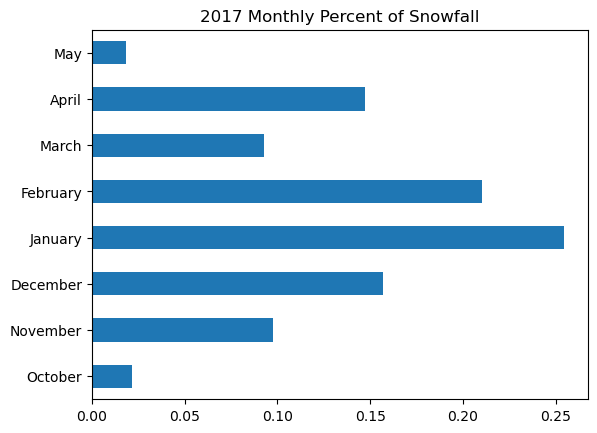

In [16]:
(season2017
 .resample('ME')
 .sum()
 .div(season2017.sum())
 .rename(lambda idx: idx.month_name())
 .plot.barh(title='2017 Monthly Percent of Snowfall')
 )

In [17]:
import pandas as pd

url = 'https://github.com/mattharrison/datasets/raw/master/data/''vehicles.csv.zip'
df = pd.read_csv(url, dtype_backend='pyarrow', engine='pyarrow')
pd.set_option('display.max_columns', None)

def gt20(val):
    return val > 20

city_mpg = df.city08
highway_mpg = df.highway08
make = df.make

<Axes: xlabel='make'>

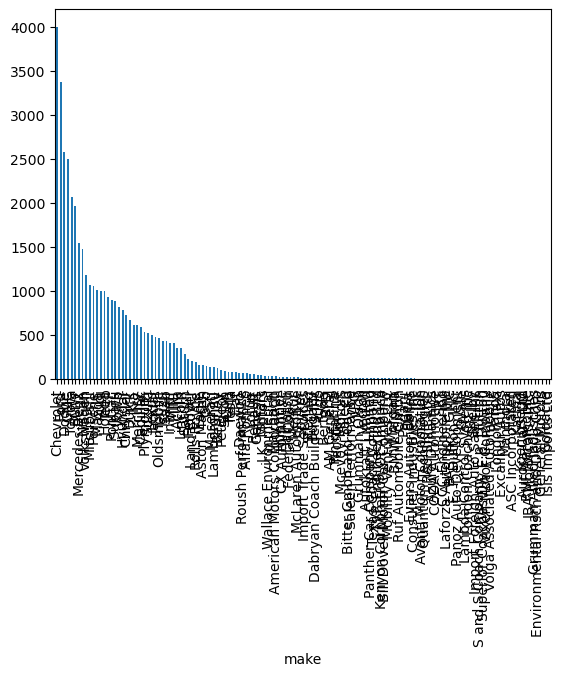

In [18]:
(make
 .value_counts()
 .plot.bar()
 )

<Axes: >

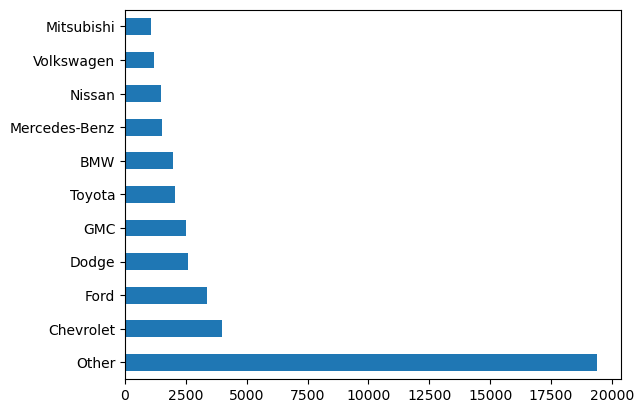

In [29]:
top10 = (make.value_counts()
         .head(10))

other = pd.Series(make
                  .value_counts()
                  .iloc[10:]
                  .sum()
                  , index=['Other'])

conc = pd.concat([other, top10])

conc.plot.barh()

<Axes: ylabel='make'>

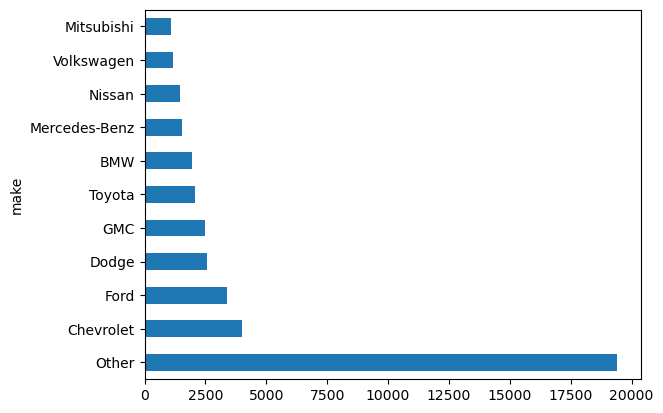

In [39]:
top10 = make.value_counts().index[:10]
(make
 .where(make.isin(top10), 'Other')
 .value_counts()
 .plot.barh()
 )

150

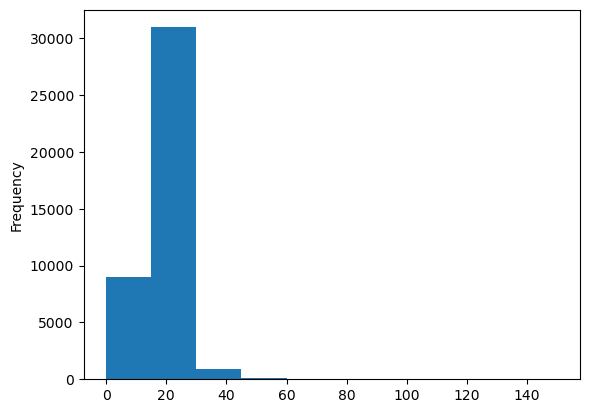

In [54]:
# Create a histogram from a numeric column. Change the bin size.

(city_mpg.plot.hist(bins=[0,15,30,45,60,75,90,105,120,135,150])) # starts from 0
city_mpg.max()


<Axes: ylabel='Frequency'>

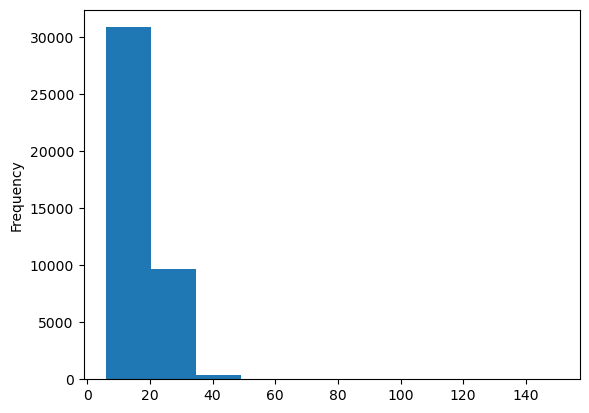

In [55]:
city_mpg.plot.hist(bins=10) # starts from the first MPG value

<Axes: >

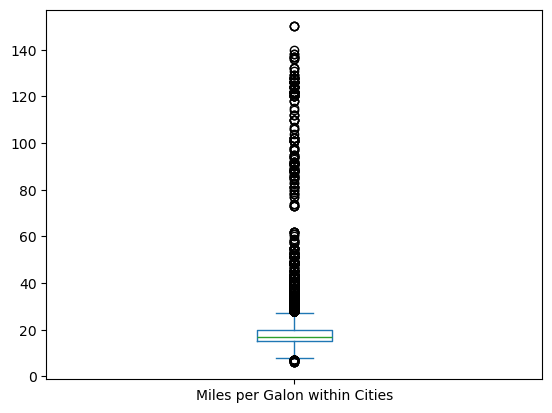

In [58]:
# Create a boxplot from a numeric column.

(city_mpg
 .plot.box(label='Miles per Galon within Cities'))

<Axes: ylabel='Density'>

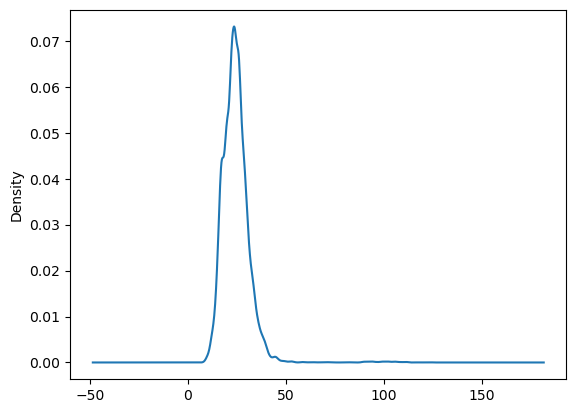

In [60]:
# Create a Kernel Density Estimate plot from a numeric column

(highway_mpg
 .plot.kde()
 )

<Axes: >

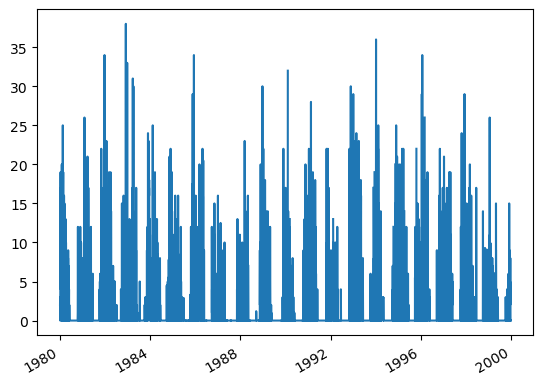

In [64]:
# Create a line from a numeric column.

(snow
 .loc['1980':'1999']
 .plot.line()
 )

<Axes: >

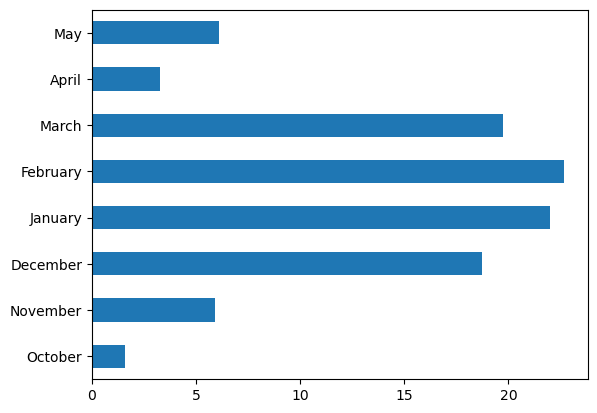

In [87]:
# Create a bar plot from the frequency count of a categorical column.

season2000 = (snow.loc['1999-10':'2000-05'])

(season2000
 .resample('ME')
 .sum()
 .div(season2000
      .sum())
      .mul(100)
 .rename(lambda idx: idx.month_name())
 .plot.barh()
 )

